In [26]:
import re # for regular expressions
import pandas as pd 
#pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [27]:
# Read in from pandas
restaurantDf = pd.read_excel("C:\\Users\\Petros\\Desktop\\reviews.xlsx")
restaurantDf.columns=['Description', 'GroundTruth', 'Ratings','Review Date', 'Review Title', 'Site']

In [28]:
restaurantDf.head()

,Description,GroundTruth,Ratings,Review Date,Review Title,Site
0,I visit this place with my friends. It was ver...,positive,5,"March 1, 2020",The Best Italian Food in Larissa,NaN
1,It deserves every star given in Trip Advisor. ...,positive,5,"January 9, 2020",Excellent,NaN
2,Great good and value for money. A must visit i...,positive,5,"December 20, 2019",Great good!,NaN
3,We went with friends. We took seats in the gar...,positive,5,"June 7, 2019","Delicious food, excellent service",NaN
4,Beautiful and cosy place ! Delicious and big p...,positive,5,"March 6, 2019",Excellent !,NaN


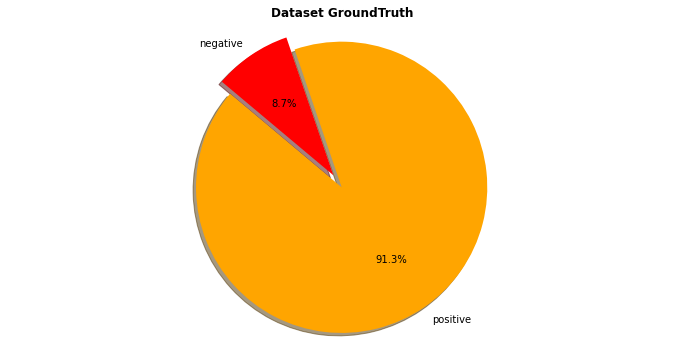

In [29]:
#plt.figure(figsize = (12,6))
#restaurantDf['GroundTruth'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "green"])
#plt.title('Dataset GroundTruth')
#plt.axis('equal')
#plt.show()

plt.figure(figsize = (12,6))
names = restaurantDf['GroundTruth'].value_counts()[:11].index
values = restaurantDf['GroundTruth'].value_counts()[:11].values
colors = ['orange','red']
explode = (0.1, 0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Dataset GroundTruth", weight = 'bold')
plt.show()

In [30]:
reiewsDf = restaurantDf[['GroundTruth', 'Description']]

In [31]:
reiewsDf.head()

,GroundTruth,Description
0,positive,I visit this place with my friends. It was ver...
1,positive,It deserves every star given in Trip Advisor. ...
2,positive,Great good and value for money. A must visit i...
3,positive,We went with friends. We took seats in the gar...
4,positive,Beautiful and cosy place ! Delicious and big p...


In [32]:
reiewsDf.tail()

,GroundTruth,Description
1035,positive,"Staff was very polite, the music and the ambie..."
1036,positive,"Nice place very good food, fast service good p..."
1037,positive,We were about 20 people and they didn't have a...
1038,positive,Everything said in the title :)\nWe came to Tr...
1039,positive,Went here for dinner. the server was excellent...


In [33]:
j=0
for i in reiewsDf['GroundTruth']:
    if i == 'negative':
        reiewsDf['GroundTruth'][j] = 1
    else:
        reiewsDf['GroundTruth'][j] = 0
    j = j + 1

C:\Users\Petros\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
reiewsDf

,GroundTruth,Description
0,0,I visit this place with my friends. It was ver...
1,0,It deserves every star given in Trip Advisor. ...
2,0,Great good and value for money. A must visit i...
3,0,We went with friends. We took seats in the gar...
4,0,Beautiful and cosy place ! Delicious and big p...
5,0,When we arrived were are group of 4 with reser...
6,0,We went here with my husband and daugther for ...
7,0,Really good place to have dinner..... Try the ...
8,1,I had a pretty uninspiring meal at Nonna Rossa...
9,1,"It used to be very good. Last time, the main d..."


In [35]:
reiewsDf.to_excel("C:\\Users\\Petros\\Desktop\\reiewsDf.xlsx")

In [36]:
positiveDf=reiewsDf[reiewsDf['GroundTruth']== 0]
len(positiveDf)

950

In [37]:
negativeDf=reiewsDf[reiewsDf['GroundTruth']== 1]
len(negativeDf)

90

In [38]:
reiewsDf.insert(0, 'id', range(1, 1 + len(reiewsDf)))
reiewsDf

,id,GroundTruth,Description
0,1,0,I visit this place with my friends. It was ver...
1,2,0,It deserves every star given in Trip Advisor. ...
2,3,0,Great good and value for money. A must visit i...
3,4,0,We went with friends. We took seats in the gar...
4,5,0,Beautiful and cosy place ! Delicious and big p...
5,6,0,When we arrived were are group of 4 with reser...
6,7,0,We went here with my husband and daugther for ...
7,8,0,Really good place to have dinner..... Try the ...
8,9,1,I had a pretty uninspiring meal at Nonna Rossa...
9,10,1,"It used to be very good. Last time, the main d..."


In [39]:
reiewsDf.to_excel("C:\\Users\\Petros\\Desktop\\reiewsDf.xlsx")

In [40]:
reiewsDf.shape

(1040, 3)

In [41]:
processed_features = []

for sentence in range(0, len(reiewsDf['Description'])):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(reiewsDf['Description'][sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [42]:
reiewsDf['Tidy_Description'] = processed_features
reiewsDf.head()

C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,GroundTruth,Description,Tidy_Description
0,1,0,I visit this place with my friends. It was ver...,i visit this place with my friends it was very...
1,2,0,It deserves every star given in Trip Advisor. ...,it deserves every star given in trip advisor d...
2,3,0,Great good and value for money. A must visit i...,great good and value for money must visit in l...
3,4,0,We went with friends. We took seats in the gar...,we went with friends we took seats in the gard...
4,5,0,Beautiful and cosy place ! Delicious and big p...,beautiful and cosy place delicious and big por...


In [43]:
reiewsDf['Tidy_Description'] = reiewsDf['Tidy_Description'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

reiewsDf.head(10)

C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,GroundTruth,Description,Tidy_Description
0,1,0,I visit this place with my friends. It was ver...,visit this place with friends was very nice re...
1,2,0,It deserves every star given in Trip Advisor. ...,deserves every star given trip advisor delicio...
2,3,0,Great good and value for money. A must visit i...,great good and value for money must visit lari...
3,4,0,We went with friends. We took seats in the gar...,went with friends took seats the garden nice s...
4,5,0,Beautiful and cosy place ! Delicious and big p...,beautiful and cosy place delicious and big por...
5,6,0,When we arrived were are group of 4 with reser...,when arrived were are group with reservation t...
6,7,0,We went here with my husband and daugther for ...,went here with husband and daugther for christ...
7,8,0,Really good place to have dinner..... Try the ...,really good place have dinner try the local ve...
8,9,1,I had a pretty uninspiring meal at Nonna Rossa...,had pretty uninspiring meal nonna rossa the st...
9,10,1,"It used to be very good. Last time, the main d...",used very good last time the main dishes were ...


In [44]:
tokenized_description = reiewsDf['Tidy_Description'].apply(lambda x: x.split())
tokenized_description.head()

0    [visit, this, place, with, friends, was, very,...
1    [deserves, every, star, given, trip, advisor, ...
2    [great, good, and, value, for, money, must, vi...
3    [went, with, friends, took, seats, the, garden...
4    [beautiful, and, cosy, place, delicious, and, ...
Name: Tidy_Description, dtype: object

In [45]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_description = tokenized_description.apply(lambda x: [ps.stem(i) for i in x])

tokenized_description.head()

0    [visit, thi, place, with, friend, wa, veri, ni...
1    [deserv, everi, star, given, trip, advisor, de...
2    [great, good, and, valu, for, money, must, vis...
3    [went, with, friend, took, seat, the, garden, ...
4    [beauti, and, cosi, place, delici, and, big, p...
Name: Tidy_Description, dtype: object

In [46]:
for i in range(len(tokenized_description)):
    tokenized_description[i] = ' '.join(tokenized_description[i])

reiewsDf['Tidy_Description'] = tokenized_description
reiewsDf.head()

C:\Users\Petros\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id,GroundTruth,Description,Tidy_Description
0,1,0,I visit this place with my friends. It was ver...,visit thi place with friend wa veri nice resta...
1,2,0,It deserves every star given in Trip Advisor. ...,deserv everi star given trip advisor delici pl...
2,3,0,Great good and value for money. A must visit i...,great good and valu for money must visit laris...
3,4,0,We went with friends. We took seats in the gar...,went with friend took seat the garden nice set...
4,5,0,Beautiful and cosy place ! Delicious and big p...,beauti and cosi place delici and big portion c...


In [34]:
#import sys
#print(sys.executable)

C:\Users\Petros\Anaconda3\python.exe


In [38]:
#!C://Users//Petros//Anaconda3//python -m pip install wordcloud

In [47]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [48]:
all_words_positive = ' '.join(text for text in reiewsDf['Tidy_Description'][reiewsDf['GroundTruth']==0])

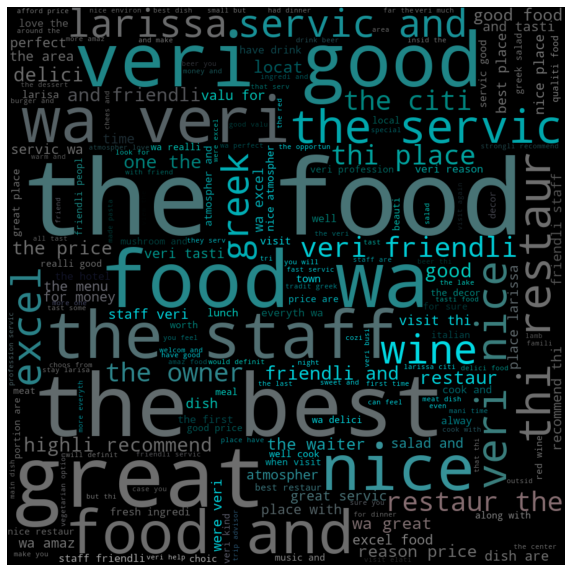

In [61]:
# combining the image with the dataset
#Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
Mask = np.array(Image.open(requests.get('http://clipart-library.com/newhp/kissclipart-worldwide-icon-earth-icon-science-icon-609b2ae4329514b6.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [62]:
all_words_negative = ' '.join(text for text in reiewsDf['Tidy_Description'][reiewsDf['GroundTruth']==1])

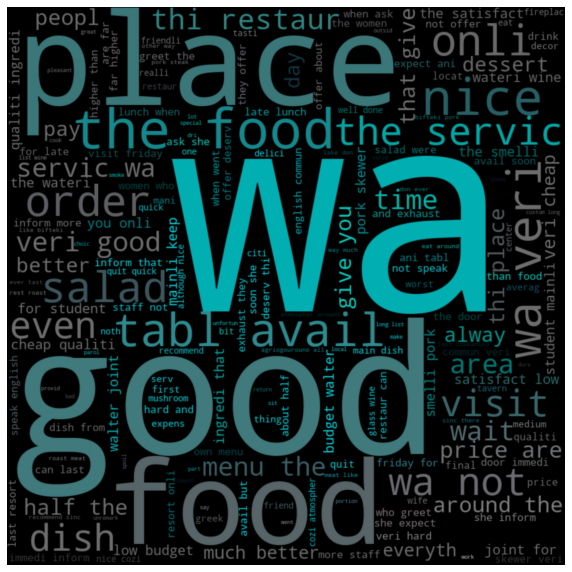

In [63]:
# combining the image with the dataset
#Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
Mask = np.array(Image.open(requests.get('http://clipart-library.com/newhp/kissclipart-worldwide-icon-earth-icon-science-icon-609b2ae4329514b6.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(reiewsDf['Tidy_Description'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(reiewsDf['Tidy_Description'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [116]:
train_bow = bow

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [117]:
train_tfidf_matrix = tfidf_matrix

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
train = pd.read_excel("C:\\Users\\Petros\\Desktop\\train.xlsx")

In [119]:
train.columns=['num','id', 'GroundTruth','Description']
train.head()

,num,id,GroundTruth,Description
0,0,1,0,I visit this place with my friends. It was ver...
1,1,2,0,It deserves every star given in Trip Advisor. ...
2,2,3,0,Great good and value for money. A must visit i...
3,3,4,0,We went with friends. We took seats in the gar...
4,4,5,0,Beautiful and cosy place ! Delicious and big p...


In [120]:
del train['num']

In [121]:
train.head()

,id,GroundTruth,Description
0,1,0,I visit this place with my friends. It was ver...
1,2,0,It deserves every star given in Trip Advisor. ...
2,3,0,Great good and value for money. A must visit i...
3,4,0,We went with friends. We took seats in the gar...
4,5,0,Beautiful and cosy place ! Delicious and big p...


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['GroundTruth'],test_size=0.3,random_state=2)

In [124]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['GroundTruth'],test_size=0.3,random_state=17)

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [127]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.43798916e-01, 5.62010841e-02],
       [9.97560254e-01, 2.43974570e-03],
       [9.98392804e-01, 1.60719609e-03],
       [9.97717188e-01, 2.28281171e-03],
       [9.87848393e-01, 1.21516065e-02],
       [9.89488105e-01, 1.05118947e-02],
       [9.82649345e-01, 1.73506553e-02],
       [9.81893441e-01, 1.81065590e-02],
       [9.87973320e-01, 1.20266797e-02],
       [9.86299177e-01, 1.37008228e-02],
       [9.99001669e-01, 9.98331400e-04],
       [9.96768943e-01, 3.23105689e-03],
       [1.05785982e-01, 8.94214018e-01],
       [9.89249317e-01, 1.07506835e-02],
       [9.42759439e-01, 5.72405612e-02],
       [8.90510555e-01, 1.09489445e-01],
       [9.22065913e-01, 7.79340869e-02],
       [9.57645004e-01, 4.23549965e-02],
       [9.95484191e-01, 4.51580851e-03],
       [9.66407975e-01, 3.35920249e-02],
       [9.56920717e-01, 4.30792830e-02],
       [9.98553341e-01, 1.44665900e-03],
       [9.80907549e-01, 1.90924510e-02],
       [9.89249317e-01, 1.07506835e-02],
       [9.939859

In [129]:
from sklearn.metrics import f1_score

In [130]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.7317073170731708

In [131]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.93955597, 0.06044403],
       [0.93548506, 0.06451494],
       [0.92596211, 0.07403789],
       [0.95341929, 0.04658071],
       [0.96264039, 0.03735961],
       [0.94859282, 0.05140718],
       [0.95151636, 0.04848364],
       [0.93095939, 0.06904061],
       [0.93089496, 0.06910504],
       [0.92016146, 0.07983854],
       [0.87917118, 0.12082882],
       [0.9254544 , 0.0745456 ],
       [0.64840465, 0.35159535],
       [0.9399531 , 0.0600469 ],
       [0.93156825, 0.06843175],
       [0.92457059, 0.07542941],
       [0.88575775, 0.11424225],
       [0.91388503, 0.08611497],
       [0.94632306, 0.05367694],
       [0.90884712, 0.09115288],
       [0.96264039, 0.03735961],
       [0.96264039, 0.03735961],
       [0.96179257, 0.03820743],
       [0.91935038, 0.08064962],
       [0.90436952, 0.09563048],
       [0.94204962, 0.05795038],
       [0.91932223, 0.08067777],
       [0.93063655, 0.06936345],
       [0.95020203, 0.04979797],
       [0.88114579, 0.11885421],
       [0.

In [133]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5909090909090909

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [136]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [137]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [138]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.6415094339622641

In [139]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [140]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [141]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.71875

In [142]:
Algo=['LogisticRegression(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','DecisionTree(TF-IDF)']

In [143]:
score = [log_bow,dct_score_bow,log_tfidf,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,5)])

In [144]:
compare.T

,1,2,3,4
Model,LogisticRegression(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.731707,0.641509,0.590909,0.71875


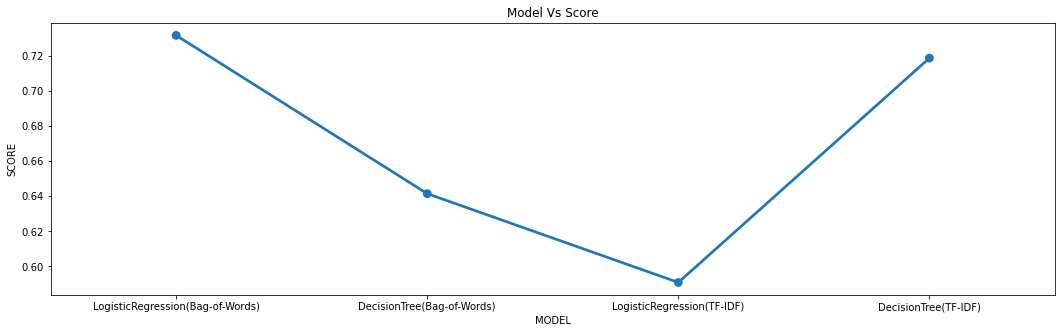

In [145]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()